In [2]:
#specialized visualization tools

In [3]:
# Reading the data set 
# importing libraries 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl

#readin the data 
df = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2, engine='openpyxl')
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
# performing some preprocessing stuff to the dataset
print(df.shape)

(195, 43)


In [5]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)


# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))
# or we have another code to do the same 

# df.columns = df.columns.astype(str)

# This code will convert all the column labels to strings, ensuring consistency in their data type.




# set the country name as index - useful for quickly looking up countries using .loc method
df.set_index('Country', inplace=True)

# add total column
df['Total'] = df.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df.shape)
years

data dimensions: (195, 38)


C:\Users\PC\AppData\Local\Temp\ipykernel_13420\1916161078.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.sum(axis=1)


['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [6]:
# visualization part 
# 1. Piechart
# A pie chart is a circular graphic that displays numeric proportions by dividing a circle (or pie) 
# into proportional slices. You are most likely already familiar with pie charts as it is 
# widely used in business and media. We can create pie charts in Matplotlib by passing in the kind=pie keyword.

In [7]:
# Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the 
# entire time period from 1980 to 2013.



# grouping countries by continents and apply sum() function 
df_continents = df.groupby('Continent', axis=0).sum()

print(type(df.groupby('Continent', axis=0)))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [8]:
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


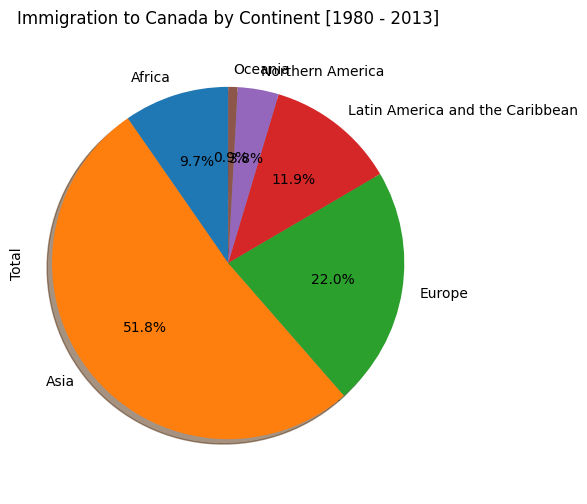

In [9]:
# Step 2: Plot the data. We will pass in kind = 'pie' keyword, along with the following additional parameters:

# autopct - is a string or function used to label the wedges with their numeric value. The label will be 
# placed inside the wedge. If it is a format string, the label will be fmt%pct.
# startangle - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
# shadow - Draws a shadow beneath the pie (to give a 3D feel).



# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()


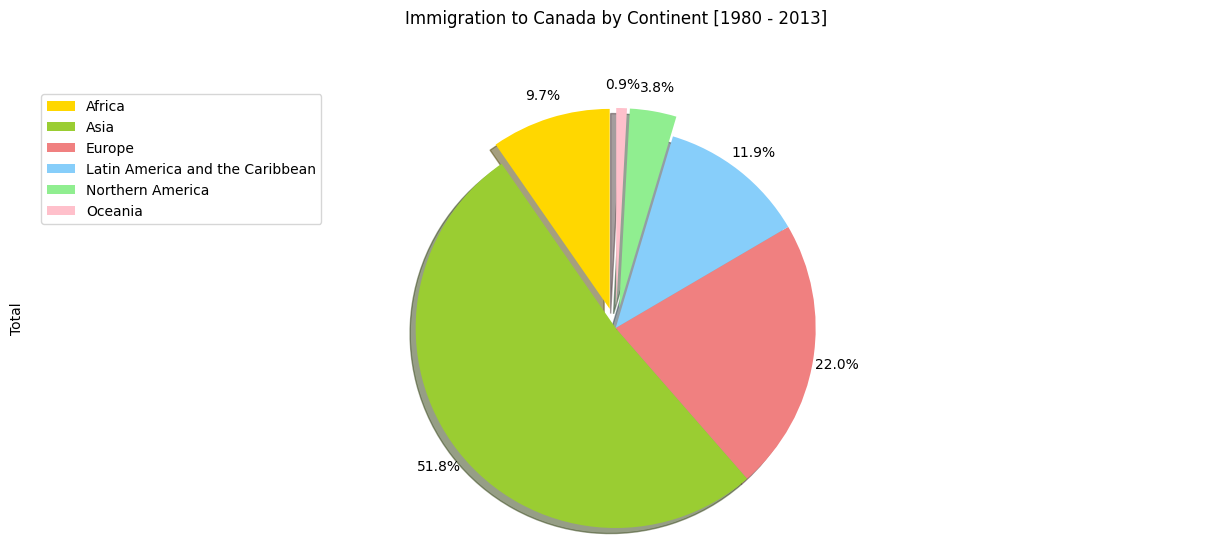

In [10]:
# The above visual is not very clear, the numbers and text overlap in some instances. Let's 
# make a few modifications to improve the visuals:

# Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend().
# Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter.
# Pass in a custom set of colors for continents by passing in colors parameter.
# Explode the pie chart to emphasize the lowest three continents (Africa, North America, and 
# Latin America and Caribbean) by passing in explode parameter.

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()



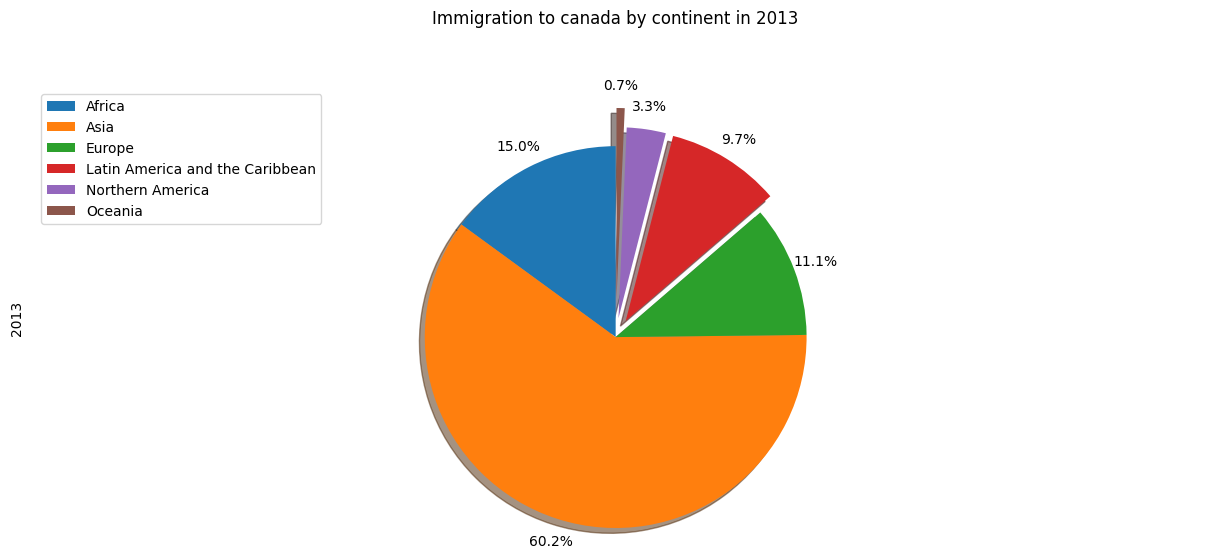

In [11]:
# Question: Using a pie chart, explore the proportion (percentage) of new immigrants grouped 
# by continents in the year 2013.

# Note: You might need to play with the explore values in order to fix any overlapping slice values.

explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2]
df_continents['2013'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct = '%1.1f%%',
                           startangle = 90, 
                           shadow = True, 
                           labels = None,
                           pctdistance = 1.12, 
                           explode = explode_list
                           )


plt.title('Immigration to canada by continent in 2013', y=1.12)
plt.axis('equal')

# adding legend
plt.legend(labels = df_continents.index, loc = 'upper left')

# showing plot 
plt.show()

In [12]:
# A box plot is a way of statistically representing the distribution of the data through five main dimensions:

# Minimum: The smallest number in the dataset excluding the outliers.
# First quartile: Middle number between the minimum and the median.
# Second quartile (Median): Middle number of the (sorted) dataset.
# Third quartile: Middle number between median and maximum.
# Maximum: The largest number in the dataset excluding the outliers

In [13]:
# method to plot boxplot 
# To make a boxplot, we can use kind=box in plot method invoked on a pandas series or dataframe.

##  plot the box plot for the Japanese immigrants between 1980 - 2013.
# Step 1: Get the subset of the dataset. Even though we are extracting the data for just one country, 
# we will obtain it as a dataframe. This will help us with calling the dataframe.describe() method to 
# view the percentiles.

In [14]:
#To get a dataframe, place extra square bracket around 'Japan' 
df_japan = df.loc[['Japan'], years].transpose()
df_japan

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246
1985,198
1986,248
1987,422
1988,324
1989,494


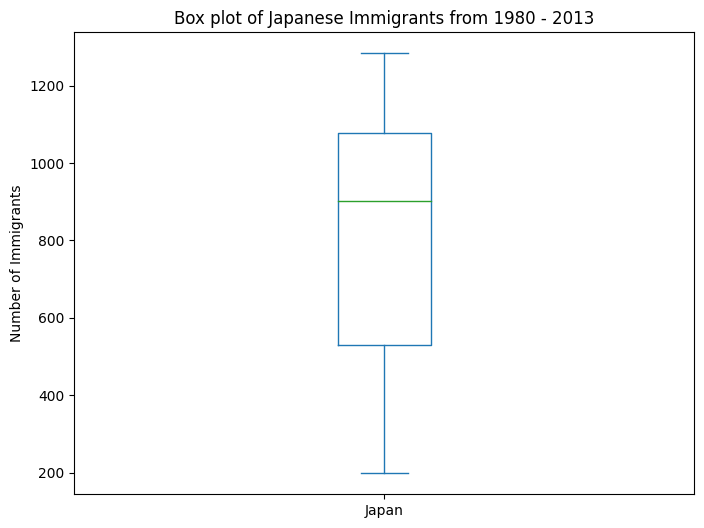

In [15]:
# step 2: Plot by passing in kind = 'box'
df_japan.plot(kind='box', figsize=(8,6))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()

In [16]:
# We can immediately make a few key observations from the plot above:

# The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median 
# number of immigrants is around 900 (median).
# 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
# 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

In [17]:
# statistical description
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [18]:

# Question: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013
df_CI = df.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


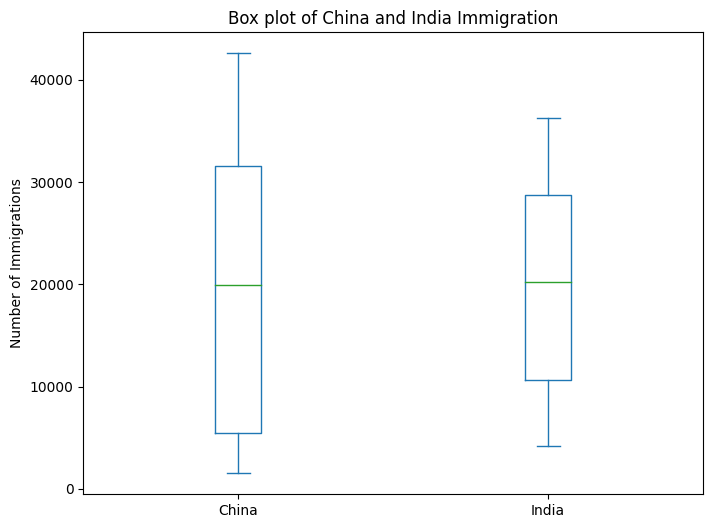

In [19]:
# Plotting by passing in kind='box'
df_CI.plot(kind='box', figsize = (8,6))
plt.title('Box plot of China and India Immigration')
plt.ylabel('Number of Immigrations')
plt.show()

In [20]:
# Let's view the percentiles associated with both countries using the describe() method.
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


In [21]:
# We can observe that, while both countries have around the same median immigrant population (~20,000), 
# China's immigrant population range is more spread out than India's. The maximum population from India 
# for any year (36,210) is around 15% lower than the maximum population from China (42,584).

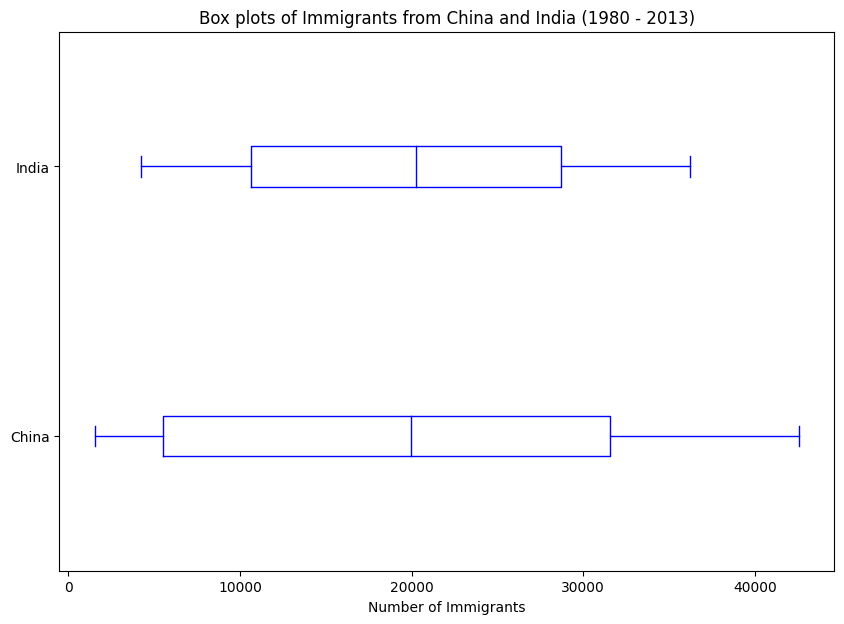

In [22]:
# creating the horizontal parameter 
# If you prefer to create horizontal box plots, you can pass the vert parameter in the plot function 
# and assign it to False. You can also specify a different color in case you are not a big fan of the default red color.


#horizontal box plots
df_CI.plot(kind='box', figsize=(10,7), color = 'blue', vert = False)
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

In [23]:
# # Subplots
# Often times we might want to plot multiple plots within the same figure. For example, we might want to 
# perform a side by side comparison of the box plot with the line plot of China and India's immigration.

# To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, 
# each containing a plot. With subplots, we usually work with the artist layer instead of the scripting layer.

In [24]:

# Typical syntax is :

#     fig = plt.figure() # create figure
#     ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
# Where

# nrows and ncols are used to notionally split the figure into (nrows * ncols) sub-axes,
# plot_number is used to identify the particular subplot that this function is to create 
# within the notional grid. 
# plot_number starts at 1, increments across rows first and has a maximum of nrows * ncols as shown below.


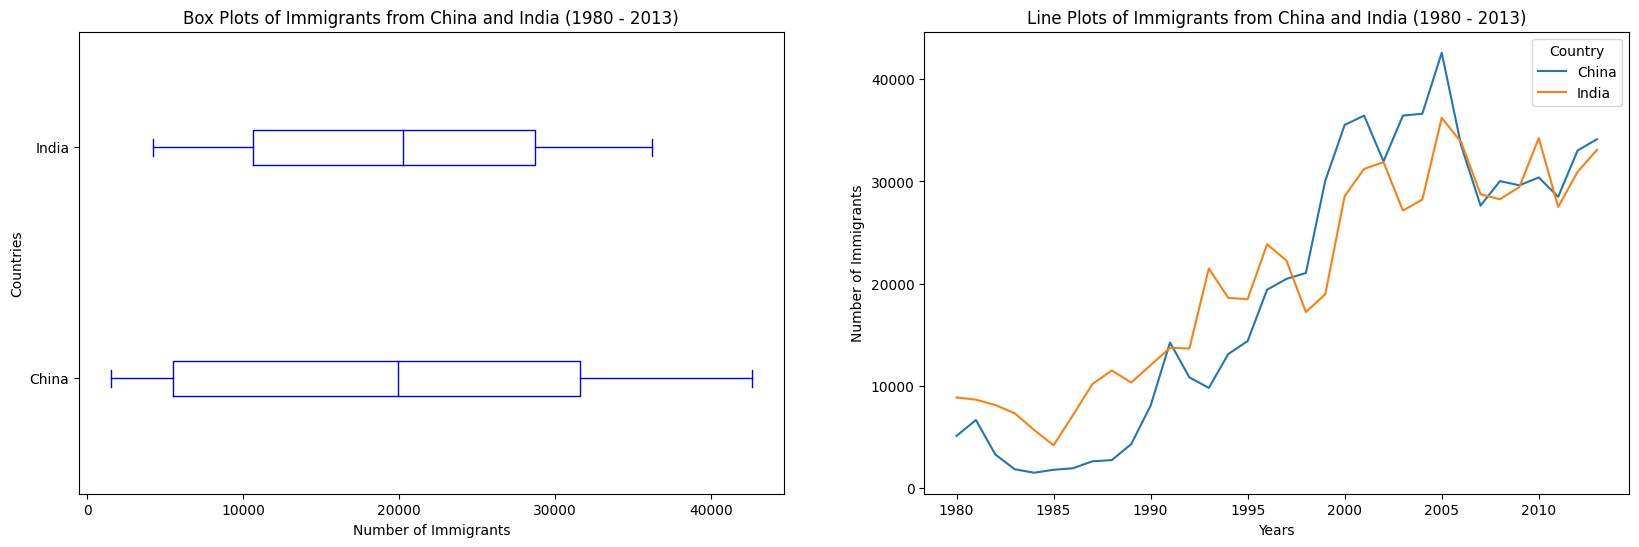

In [25]:
fig = plt.figure()              # create figure

ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [26]:
# Question: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) 
# grouped by the decades 1980s, 1990s, and 2000s

In [27]:
# Step 1: Obtaining the top 15 countries based on Total immigrant population. Name the dataframe df_top15.

df_top15 = df.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [28]:
# Step 2: Creating a new dataframe which contains the aggregate for each decade. One way to do that:

# Create a list of all years in decades 80's, 90's, and 00's.
# Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
# Merge the three series into a new data frame. Call your dataframe new_df.

# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

# display dataframe
new_df.head()






,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [29]:
# getting the statistical description 
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


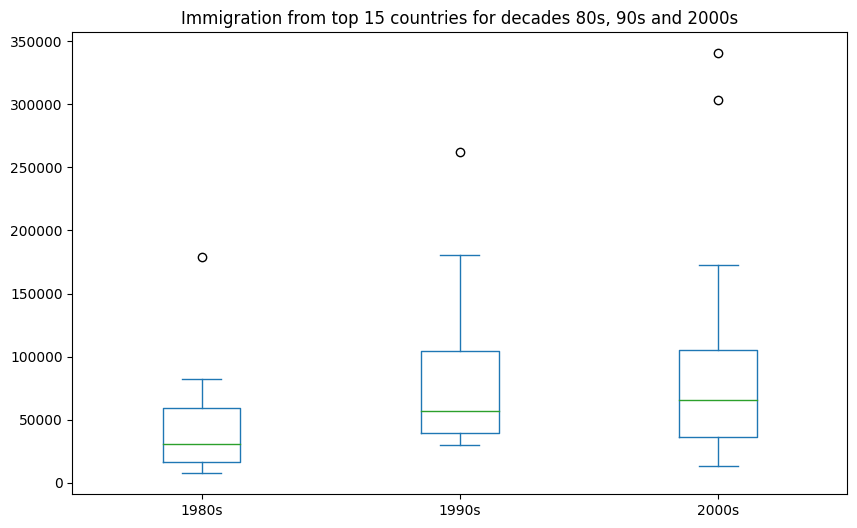

In [30]:
#plotting the box plot 
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

In [31]:
# checking how many entries  fall above the outlier threshold
new_df = new_df.reset_index()
new_df[new_df['2000s'] > 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


In [32]:
# China and India are both considered as outliers since their population for the decade exceeds 209,611.5.

In [33]:
# Scatter Plots
# A scatter plot (2D) is a useful method of comparing variables against each other. Scatter plots look 
# similar to line plots in that they both map independent and dependent variables on a 2D graph. While 
# the data points are connected together by a line in a line plot, they are not connected in a scatter plot. 
# The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, 
# we can mathematically calculate this relationship and use it to predict trends outside the dataset.



In [34]:
## visualizing the trend of total immigration to canada for the years 1980-2013 using scatter plot 


In [35]:
# step 1: getting the data. since we are expecting to use the relationship between years and total population
# we will convert years to int type 


# we can use the sum() method to get the total population per year 
df_total = pd.DataFrame(df[years].sum(axis=0))

#change the years to type int which will be used for regression
df_total.index = map(int, df_total.index)


#reset the index to put in back in as a column in the df_total dataframe
df_total.reset_index(inplace= True)


# renaming columns 
df_total.columns = ['year', 'total']

df_total.head()


,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [36]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


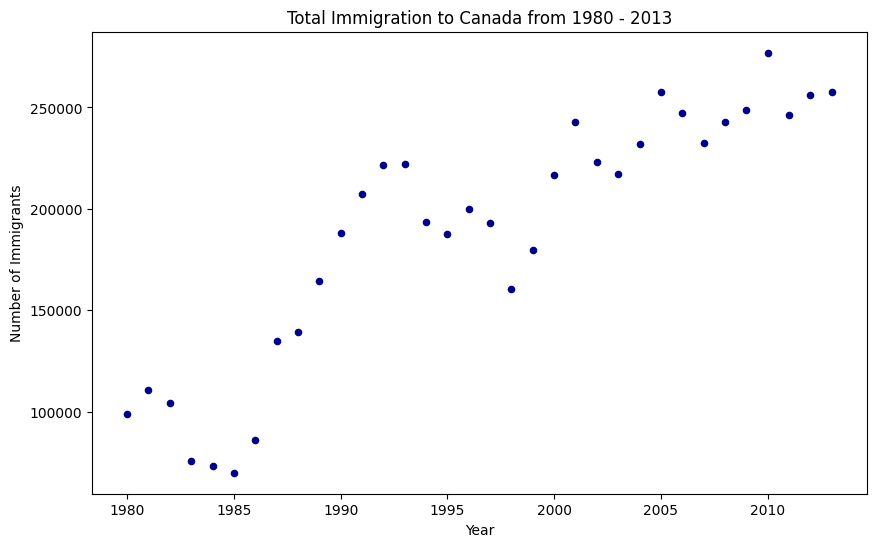

In [37]:
# step 2 : Plotting the data 
# In Matplotlib, we can create a scatter plot set by passing in kind='scatter' as plot argument. 
# We will also need to pass in x and y keywords to specify the columns that go on the x- and the y-axis.



df_total.plot(kind='scatter', x= 'year', y='total', figsize=(10,6), color = 'darkblue')
#here x ma chai sabai year ko rakhna parxa and y ma chai each year ma kati immigrants xa tyo rakhna parxa 

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [38]:
# conclusion 
# Notice how the scatter plot does not connect the data points together. We can clearly observe an upward 
# trend in the data: as the years go by, the total number of immigrants increases. 
# We can mathematically analyze this upward trend using a regression line (line of best fit).

In [39]:
# Plotting a linear line of best fit and using it to predict the number of immigrants in 2015 


In [40]:
# step 1 : Step 1: Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:

# x: x-coordinates of the data.
# y: y-coordinates of the data.
# deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

import numpy as np
x = df_total['year']
y = df_total['total']
fit = np.polyfit(x,y, deg = 1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

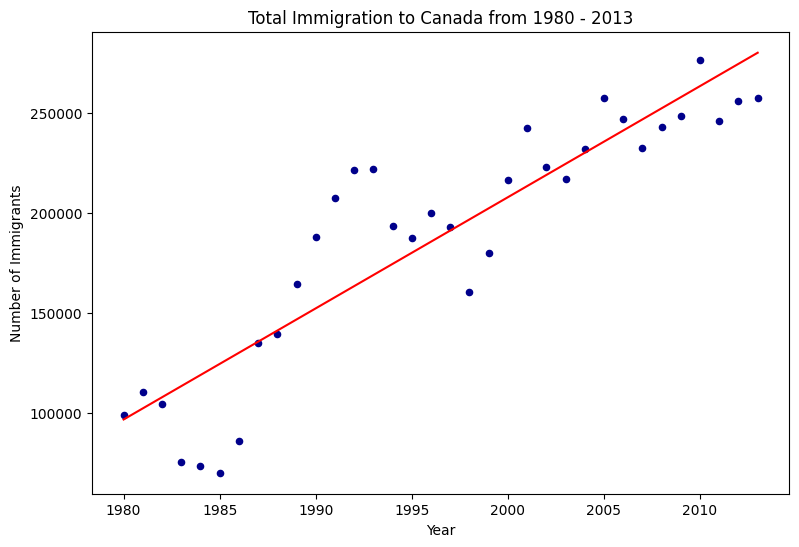

'No. Immigrants = 5567 * Year + -10926195'

In [41]:
# Plotting the regression line on the scatter plot 
df_total.plot(kind='scatter', x='year', y='total', figsize=(9,6), color = 'darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot the line of best fit 
plt.plot(x, fit[0]*x + fit[1], color = 'red')
plt.annotate('y = {0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 1500000))
plt.show()


# printing out the line of best fit 

'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

In [42]:
# Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

# No. Immigrants = 5567 * Year - 10926195
# No. Immigrants = 5567 * 2015 - 10926195
# No. Immigrants = 291,310

In [43]:
# # Question: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?
# Step 1: Get the data:

# Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it df_countries.

# Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. 
# Name this new dataframe df_total.

# Reset the index in place.
# Rename the columns to year and total.
# Display the resulting dataframe.


# create df_countries dataframe
df_countries = df.loc[['Norway', 'Sweden', 'Denmark'], years].transpose()
df_countries.head()


# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns 
df_total.columns = ['year', 'total']

#changing column year from string to int to create scatter plot 
df_total['year'] = df_total['year'].astype(int)


# showing the result in dataframe 
df_total.head()


,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


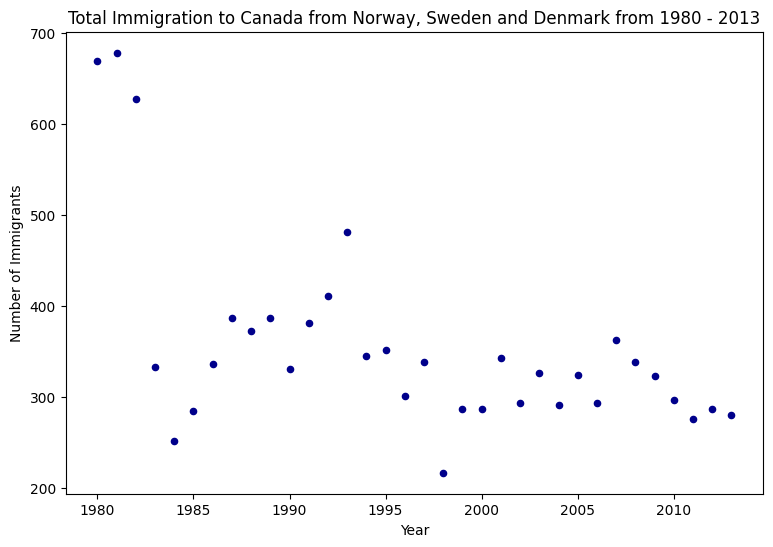

In [44]:
# Step 2: Generate the scatter plot by plotting the total versus year in df_total.

df_total.plot(kind='scatter', x='year', y='total', figsize=(9,6), color = 'darkblue')
plt.title('Total Immigration to Canada from Norway, Sweden and Denmark from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

In [45]:
# Bubble Plots 
# A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). The data points are 
# replaced with bubbles, and the size of the bubble is determined by the third variable z, also known as the weight. 
# In maplotlib, we can pass in an array or scalar to the parameter s to plot(), that contains the weight of each point.

In [46]:
# compare Argentina's immigration to that of it's neighbour Brazil
# using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013



# Step 1: Get the data for Brazil and Argentina. Like in the previous example, we will convert 
# the Years to type int and include it in the dataframe.


# transposed dataframe
df_t = df[years].transpose()

# cast the Years (the index) to type int
df_t.index = map(int, df_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_t.reset_index(inplace=True)

# view the changes
df_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [47]:
# Step 2: Creating the normalized weights.

# There are several methods of normalizations in statistics, each with its own use. In this case, 
# we will use feature scaling to bring all values into the range [0, 1]. The general formula is:

# X = (X - Xmin)/(Xmax - Xmin)
# where  
# X is the original value,
#     
# X' is the corresponding normalized value. The formula sets the max value in the dataset 
# to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly.


# performing normalization using min max normalization 

# normalize Brazil data
norm_brazil = (df_t['Brazil'] - df_t['Brazil'].min()) / (df_t['Brazil'].max() - df_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_t['Argentina'] - df_t['Argentina'].min()) / (df_t['Argentina'].max() - df_t['Argentina'].min())

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


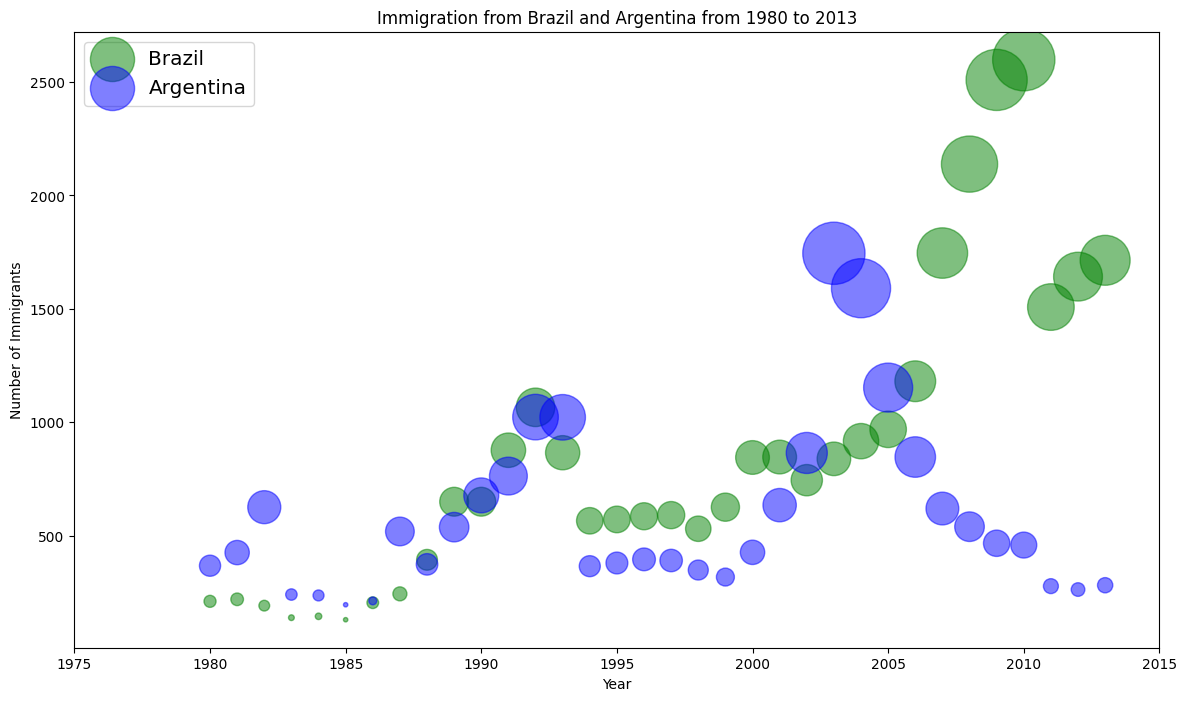

In [48]:
# Step 3: Plotting the data.

# To plot two different scatter plots in one plot, we can include the axes one plot into 
# the other by passing it via the ax parameter.
# We will also pass in the weights using the s parameter. Given that the normalized weights 
# are between 0-1, they won't be visible on the plot. Therefore, we will:
# multiply weights by 2000 to scale it up on the graph, and,
# add 10 to compensate for the min value (which has a 0 weight and therefore scale with   × 2000).


# Brazil
ax0 = df_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [49]:
# # conclusion to the bubble plot 
# The size of the bubble corresponds to the magnitude of immigrating population for that year, 
# compared to the 1980 - 2013 data. The larger the bubble is, the more immigrants are in that year.

# From the plot above, we can see a corresponding increase in immigration from Argentina during 
# the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. 
# In fact, Argentina had suffered a great depression from 1974 to 1990, just before the onset 
# of 1998 - 2002 great depression.

# On a similar note, Brazil suffered the Samba Effect where the Brazilian real (currency) dropped 
# nearly 35% in 1999. There was a fear of a South American financial crisis as many South American 
# countries were heavily dependent on industrial exports from Brazil. The Brazilian government 
# subsequently adopted an austerity program, and the economy slowly recovered over the years, 
# culminating in a surge in 2010. The immigration data reflect these events.

In [50]:
# Q: Previously in this lab, we created box plots to compare immigration from China and India to Canada. 
# Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. 
# You can use df_can_t that we defined and used in the previous example.


In [51]:
# Step 1: Normalizing the data pertaining to China and India.
  # normalized Chinese data
norm_china = (df_t['China'] - df_t['China'].min()) / (df_t['China'].max() - df_t['China'].min())
# normalized Indian data
norm_india = (df_t['India'] - df_t['India'].min()) / (df_t['India'].max() - df_t['India'].min())

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


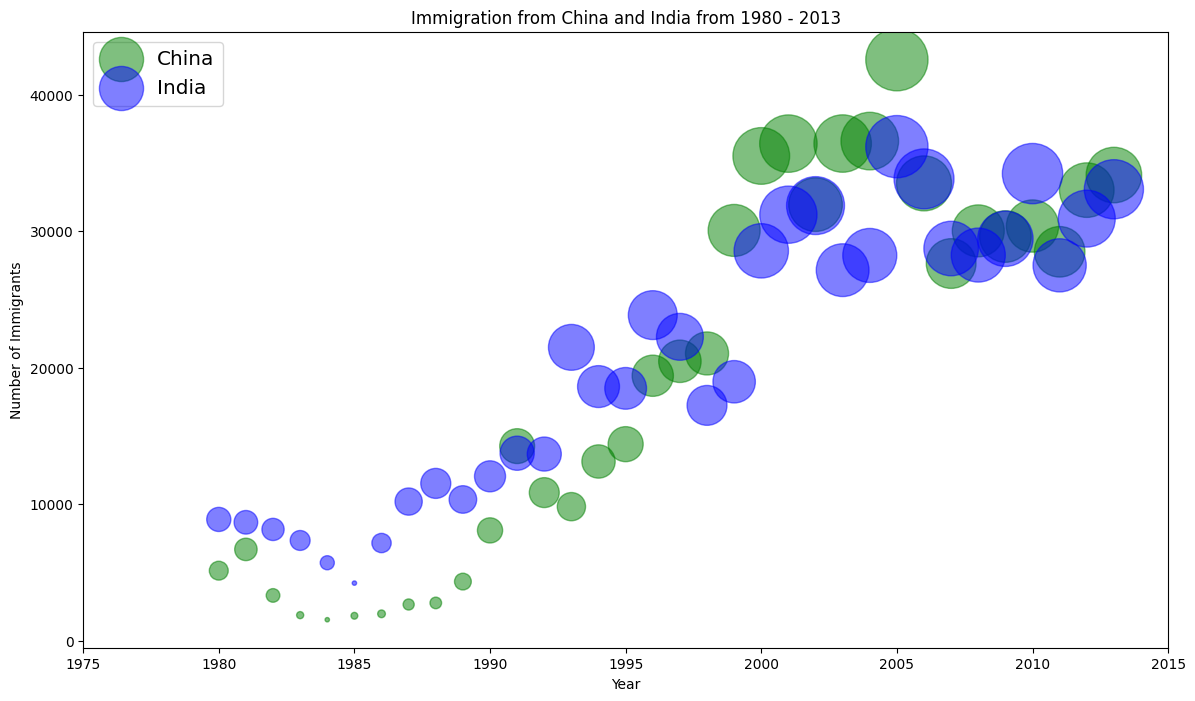

In [52]:
# Step 2: Generating the bubble plots.
  # China
ax0 = df_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# India
ax1 = df_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')